In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [0]:
mpl.style.use('ggplot')

In [3]:
print(mpl.__version__)

3.2.1


In [0]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx'
import pandas as pd


In [0]:
df = pd.read_excel(path, sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

In [6]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [0]:
#preprocess
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace=True)
df.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)
df.columns = list(map(str, df.columns))
df.set_index('Country', inplace=True)
df['Total'] = df.sum(axis = 1)
years = list(map(str, range(1980, 2014)))


In [8]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


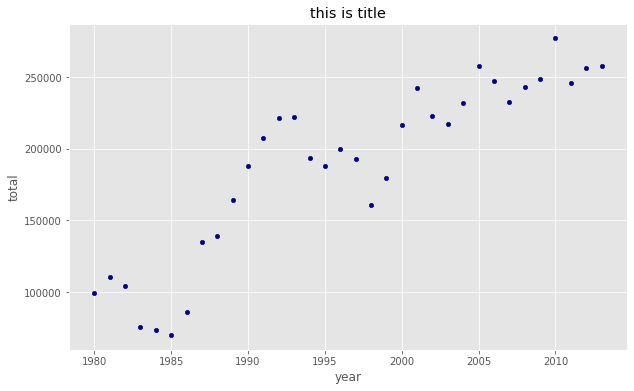

In [11]:
df_tot = pd.DataFrame(df[years].sum(axis = 0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.plot(kind = 'scatter', x = 'year', y = 'total', figsize = (10, 6), color = 'darkblue')
plt.title('this is title')
plt.xlabel('year')
plt.ylabel('total')
plt.show()

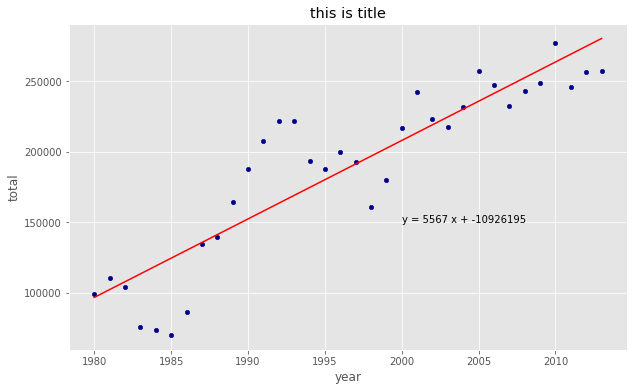

In [13]:
import numpy as np
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg = 1)
# data goc
df_tot.plot(kind = 'scatter', x = 'year', y = 'total', figsize = (10, 6), color = 'darkblue')
plt.title('this is title')
plt.xlabel('year')
plt.ylabel('total')

plt.plot(x, fit[0] * x + fit[1], color = 'red')
plt.annotate('y = {0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy = (2000, 150000))
plt.show()

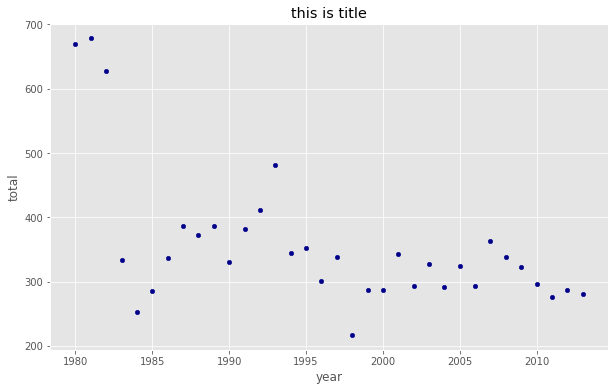

In [16]:
df_countries = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis = 1))
df_total.reset_index(inplace = True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head()
df_total.plot(kind = 'scatter', x = 'year', y = 'total', figsize = (10, 6), color = 'darkblue')
plt.title('this is title')
plt.xlabel('year')
plt.ylabel('total')
plt.show()